In [2]:
import pandas as pd
# import pandas_ta as ta


from quant_free.dataset.xq_data_load import *
from quant_free.utils.us_equity_utils import *
from quant_free.factor.price import *

start_date = '2014-01-29'
end_date = '2024-08-08'

In [2]:
import pandas as pd
from statsmodels.tsa.stattools import coint

def find_cointegrated_pairs(molecule: list, dataframe, threshold=0.05):
    pairs = []

    # for i in range(n):
    #     print(f"Main stock: {dataframe.columns[i]}")
    #     for j in range(i+1, n):
    for column in molecule:
      
      symbol0 = column[0]
      symbol1 = column[1]
      S1 = dataframe[symbol0]
      S2 = dataframe[symbol1]
# The coint function performs Engle-Granger cointegration test:
# 1. Regress S1 ~ S2 to get residuals ε = S1 - β*S2 - α
# 2. Test residuals ε for unit root using ADF test
# 3. Test statistic = ADF statistic from residuals
# Null hypothesis: No cointegration (residuals have unit root)

# The ADF test equation for residuals ε (from step 1) is:
# Δε_t = δ + βt + γε_{t-1} + α_1Δε_{t-2} + ... + α_{p}Δε_{t-p} + ε_t
# Test statistic: t-statistic of γ coefficient. 
# Null hypothesis: γ=0 (unit root exists → no cointegration)

      result = coint(S1, S2)
      p_value = result[1]
      print(f"Check stock: {symbol0} {symbol1} {p_value}")
      if p_value < threshold:
          pairs.append([symbol0, symbol1, p_value])
    
    return pairs

from quant_free.finml.utils.multiprocess import mp_pandas_obj


def find_cointegrated_pairs_multi_process(column_pairs, dataframe, num_threads: int = 12):

    paris= mp_pandas_obj(func=find_cointegrated_pairs,
                               pd_obj=('molecule', column_pairs),
                               dataframe=dataframe,
                               num_threads=num_threads,
                               )
    return paris

In [ ]:

market='cn'
equity='index'
data_index = us_dir1_load_csv(
    market=market,
    dir0=equity,
    dir1='symbols',
    filename='symbols.csv',
    index_col = None
)


symbols = data_index['symbol'].values
name = data_index['name'].values

data_trade = multi_sym_daily_load(market=market,
                                                 equity=equity,
                                                 dir_option = '',
                                                 symbols = symbols,
                                                 start_date = start_date,
                                                 end_date = end_date,
                                                 column_option = 'close')



merged_data = pd.DataFrame(data_trade)
merged_data = merged_data.dropna()

constant_cols = [col for col in merged_data.columns 
                if merged_data[col].nunique(dropna=False) == 1]
merged_data = merged_data.drop(columns=constant_cols)


from itertools import combinations
column_pairs = [list(pair) for pair in combinations(merged_data.columns, 2)]
print(f"pairs: {column_pairs}")

# Find cointegrated pairs
print(f"check the stock {merged_data.columns}")
coint_pairs = find_cointegrated_pairs_multi_process(column_pairs, merged_data)
print("Cointegrated pairs:", coint_pairs)
# print("P-values:", p_vals)

            sz399373  sz399976
2012-01-30   3493.94   2697.57
2012-01-31   3494.96   2697.57


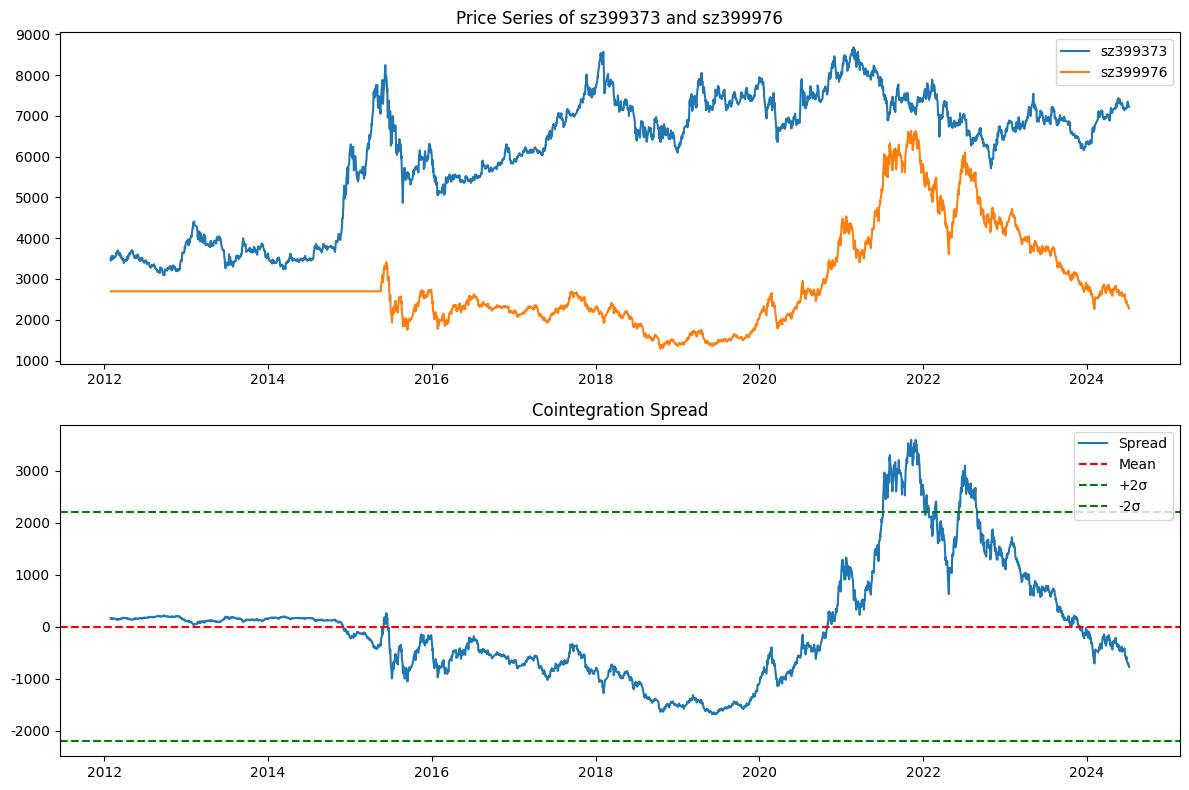

In [6]:
start_date = '2012-01-29'
end_date = '2024-07-08'

market='us'
symbols=['ALAB', 'SLAB']

market='cn'
equity='index'
symbols=['sh000028', 'sz399654']
# symbols=['sh000117', 'sz399557']
symbols=['sz399654', 'sz399557']
symbols=['sh000849', 'sz399397']
symbols=['sz399373', 'sz399976']

data_index = us_dir1_load_csv(
    market=market,
    dir0=equity,
    dir1='symbols',
    filename='symbols.csv',
    index_col = None
)
name0 = data_index.loc[data_index["symbol"] == symbols[0], "name"].values[0]
name1 = data_index.loc[data_index["symbol"] == symbols[1], "name"].values[0]
names = [name0,name1]




data = multi_sym_daily_load(market=market,
                                           equity = equity,
                                           symbols = symbols,
                                           start_date = start_date,
                                           end_date = end_date,
                                           dir_option = '',
                                           column_option = 'close')

data = pd.DataFrame(data)
print(data.head(2))

import matplotlib.pyplot as plt
import numpy as np

# Extract price data
prices = data

# Perform linear regression to find hedge ratio
X = prices[symbols[0]].values
Y = prices[symbols[1]].values
beta, alpha = np.polyfit(X, Y, 1)

# Calculate spread
spread = Y - (alpha + beta * X)

# Plot
# plt.rcParams["font.sans-serif"] = ["sans-serif"]  # For Linux
plt.rcParams["font.sans-serif"] = ["DejaVu Sans", "WenQuanYi Micro Hei", "SimHei"]
plt.rcParams["axes.unicode_minus"] = False  # Fix negative sign display
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(prices.index, prices[symbols[0]], label=symbols[0])
plt.plot(prices.index, prices[symbols[1]], label=symbols[1])
plt.title(f'Price Series of {symbols[0]} and {symbols[1]}')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(prices.index, spread, label='Spread')
plt.axhline(spread.mean(), color='red', linestyle='--', label='Mean')
plt.axhline(spread.mean() + 2*spread.std(), color='green', linestyle='--', label='+2σ')
plt.axhline(spread.mean() - 2*spread.std(), color='green', linestyle='--', label='-2σ')
plt.title('Cointegration Spread')
plt.legend()
plt.tight_layout()
plt.show()


Cointegrated pairs: [[['FORM', 'MRVL', 0.008742266432017547], ['LASR', 'ADEA', 0.02114500200658594], ['LASR', 'AIP', 0.023047799687907537], 
['LASR', 'PRSO', 0.03747369202690576], ['LASR', 'SKYT', 0.003567689192692056], ['LASR', 'NVTS', 0.01763191428300234]], [['CRDO', 'ADEA', 0.0004046365351726712], 
['CRDO', 'ASX', 0.004655582027874443], ['CRDO', 'SKYT', 0.027934521394191544], ['CRDO', 'LAES', 2.470310448444326e-08], ['CRDO', 'NVTS', 0.003744932045779491], 
['CRDO', 'SMTK', 0.03480993724663759]], [['RMBS', 'ADEA', 0.0027777826223230584], ['RMBS', 'PRSO', 0.023160750477105845], ['ALAB', 'SWKS', 0.029824991079278492],
 ['ALAB', 'QCOM', 0.047041004835193606], ['ALAB', 'ADI', 0.036965791921443815], ['ALAB', 'TSEM', 0.029737720003758593], ['ALAB', 'MPWR', 0.037205608649832855], 
 ['ALAB', 'CRUS', 0.028039466815854057], ['ALAB', 'FORM', 0.03819296775713546], ['ALAB', 'INTC', 0.025519229352153203], ['ALAB', 'LASR', 0.03593879698961624], 
 ['ALAB', 'AMBA', 0.03145609943299129], ['ALAB', 'MCHP', 0.04149246007708797], ['ALAB', 'MRVL', 0.039729798319140315], ['ALAB', 'AXTI', 0.030406834019857682], 
 ['ALAB', 'CRDO', 0.026913253488122967], ['ALAB', 'NXPI', 0.04420573316541105], ['ALAB', 'SMTC', 0.029537214110449864], ['ALAB', 'ADEA', 0.03371514897050698], 
 ['ALAB', 'SLAB', 0.02901724387287047], ['ALAB', 'AIP', 0.03942678310381367], ['ALAB', 'PRSO', 0.047258364017945156], ['ALAB', 'SKYT', 0.032945858662357504], 
 ['ALAB', 'DIOD', 0.03009779828803415], ['ALAB', 'QUIK', 0.029303462276344318], ['ALAB', 'LSCC', 0.03788057003419875], ['ALAB', 'POWI', 0.030128193972523056], 
 ['ALAB', 'MXL', 0.029441463010108557], ['ALAB', 'SITM', 0.02963607255375304], ['ALAB', 'SMTK', 0.00025259425488834077], ['QCOM', 'FORM', 0.005005490444100597]], 
 [['ALGM', 'DIOD', 0.018147672243553434], ['ALGM', 'LSCC', 0.0005146363996828172], ['MX', 'SMTC', 0.03421793517681543], ['HIMX', 'SWKS', 0.028867092261253238],
 ['HIMX', 'AMBA', 0.024576656988891395], ['HIMX', 'AXTI', 0.04065913366690857], ['HIMX', 'MXL', 0.0385215096113465], ['HIMX', 'SITM', 0.036580384542016516], 
 ['GFS', 'MU', 0.012869715663875715], ['GFS', 'OLED', 0.026709434845945085], ['GFS', 'RMBS', 0.0008882140388342783]], [['SYNA', 'AMBA', 0.02381977463755717], 
 ['GSIT', 'GFS', 0.04255422832153465], ['GSIT', 'RMBS', 0.04346022266375344], ['GSIT', 'MTSI', 0.03421639710765461], ['GSIT', 'CRDO', 0.026499889260634506],
 ['GSIT', 'ADEA', 0.020147774741081103], ['GSIT', 'ASX', 0.040915925868335846], ['GSIT', 'AIP', 0.038429480393851564], ['GSIT', 'PRSO', 0.032859977262169784], 
 ['GSIT', 'NVTS', 0.026486868082359758], ['IMOS', 'QCOM', 0.006030195611269302], ['IMOS', 'FORM', 0.03031125111635599]], [['GFS', 'ALAB', 0.02547959915758322], 
 ['GFS', 'SWKS', 0.02767821494994494], ['GFS', 'QCOM', 0.008089201008919751], ['GFS', 'MTSI', 0.013243206907256654], ['GFS', 'ADI', 0.0034144405821173052], 
 ['GFS', 'TSEM', 0.0005896961758171], ['GFS', 'MPWR', 0.011734728234284349], ['GFS', 'CRUS', 0.015532764789280186], ['GFS', 'FORM', 0.010334370446000711], 
 ['GFS', 'INTC', 0.026555084423109564], ['GFS', 'LASR', 0.0001845165982282964], ['GFS', 'AMBA', 0.022472847224397127], ['GFS', 'MCHP', 0.0033277554067864803], 
 ['GFS', 'MRVL', 0.005128518119188492], ['GFS', 'AXTI', 0.02605302443727454], ['GFS', 'CRDO', 0.029136939350903793], ['GFS', 'NXPI', 0.00781355644336703], 
 ['GFS', 'SMTC', 0.027368226891327986], ['GFS', 'ADEA', 0.0020069031893661013], ['GFS', 'ASX', 0.010151360361899293], ['GFS', 'SLAB', 0.003342887551130217], 
 ['GFS', 'AIP', 4.230386133189135e-07], ['GFS', 'PRSO', 2.4091230344183086e-05], ['GFS', 'SKYT', 2.751693118108438e-05], ['GFS', 'DIOD', 0.0008582758361732547], 
 ['GFS', 'QUIK', 0.014671858007271261], ['GFS', 'LSCC', 3.088690569612778e-05], ['GFS', 'POWI', 0.0011146705561611132], ['GFS', 'LAES', 0.02051528891390032], 
 ['GFS', 'MXL', 0.020328921395138446], ['GFS', 'SITM', 0.0038474642390479374], ['GFS', 'NVTS', 3.220537493585748e-05], ['GFS', 'SMTK', 0.02980815192129361], 
 ['MU', 'MPWR', 0.035205075260166814], ['MU', 'FORM', 0.039176191490739996], ['MU', 'MRVL', 0.03131539209867542]], [['MTSI', 'CRDO', 0.04210302840350673], 
 ['MTSI', 'ASX', 0.02181574513037415]], [['ADEA', 'ASX', 0.005456019523115242], ['ADEA', 'AIP', 0.0008731521400527634], ['ADEA', 'PRSO', 1.5157271010248354e-05], 
 ['ADEA', 'SKYT', 0.005825426908851789], ['ADEA', 'LAES', 0.0006665248603813479], ['ADEA', 'NVTS', 0.0007038715884525221], ['SLAB', 'DIOD', 0.02812858983165434], 
 ['SLAB', 'POWI', 0.0196783777677846], ['AIP', 'PRSO', 0.04248182225852942], ['AIP', 'SKYT', 0.01641620019876093], ['SKYT', 'NVTS', 0.0012273404552338384], 
 ['DIOD', 'POWI', 0.0003024229772203993], ['QUIK', 'LSCC', 0.014048355002063067], ['QUIK', 'LAES', 0.011606142099597391], ['QUIK', 'SITM', 0.013906460604384316], 
 ['QUIK', 'NVTS', 0.007124962019844952], ['QUIK', 'SMTK', 0.010444884545630478]], [['AVGO', 'CRDO', 0.03703823547082041], ['AVGO', 'ADEA', 0.025585939185714474], 
 ['SIMO', 'IMOS', 0.012130326340034721], ['SIMO', 'AOSL', 0.0014087352228012741], ['SIMO', 'TSEM', 0.01723753664786111], ['SIMO', 'MCHP', 0.04521914899970301], 
 ['SIMO', 'MRVL', 0.031640889623560875], ['SIMO', 'SLAB', 0.043621067358137276], ['SIMO', 'POWI', 0.023051651682552875], ['SIMO', 'SITM', 0.02354906239656867], 
 ['TSM', 'FORM', 0.003764341253261714], ['TSM', 'NXPI', 0.026833413666502874]], [['AMKR', 'QCOM', 0.022331949469614535], ['AMKR', 'ADI', 0.013848919345408307], 
 ['AMKR', 'MPWR', 0.0020760418200076697], ['AMKR', 'NXPI', 0.0006905595504868587], ['AMKR', 'NVTS', 0.03727753508360718], ['NVDA', 'CRDO', 0.0007087126287519299], 
 ['NVDA', 'LAES', 0.04994648048226688]], [['IMOS', 'MRVL', 0.00030897641946532665], ['IMOS', 'DIOD', 0.028175882836921167], ['IMOS', 'POWI', 0.0151551014011789], 
 ['IMOS', 'SITM', 0.021387876421308287], ['LEDS', 'AOSL', 0.004398934697236778], ['LEDS', 'ALGM', 0.004193242358872757], ['LEDS', 'MX', 0.002695629695892002], 
 ['LEDS', 'HIMX', 0.006779977665221022], ['LEDS', 'GFS', 0.0028019471060295948], ['LEDS', 'MU', 0.0043000078915915], ['LEDS', 'OLED', 0.0036571020689626114], 
 ['LEDS', 'RMBS', 0.002263476216497204], ['LEDS', 'ALAB', 0.005829389878961081], ['LEDS', 'SWKS', 0.005839727797843477], ['LEDS', 'QCOM', 0.004288289078428656], 
 ['LEDS', 'MTSI', 0.0033728165343505892], ['LEDS', 'ADI', 0.002578282261545856], ['LEDS', 'TSEM', 0.002963943117735692], ['LEDS', 'MPWR', 0.003175982731043327],
 ['LEDS', 'CRUS', 0.0025128839390007388], ['LEDS', 'FORM', 0.005013566306940831], ['LEDS', 'INTC', 0.006911800333471071], ['LEDS', 'LASR', 0.00044619424091388196], 
 ['LEDS', 'AMBA', 0.003230643369237243], ['LEDS', 'MCHP', 0.0030315169571101964], ['LEDS', 'MRVL', 0.004146770768329863], ['LEDS', 'AXTI', 0.0045069937455437924], 
 ['LEDS', 'CRDO', 0.001662505333824624], ['LEDS', 'NXPI', 0.0041926203954718464], ['LEDS', 'SMTC', 0.004483499155494877], ['LEDS', 'ADEA', 0.001124484841805777], 
 ['LEDS', 'ASX', 0.0042835728710279835], ['LEDS', 'SLAB', 0.00475980378296643], ['LEDS', 'AIP', 0.001181458541234752], ['LEDS', 'PRSO', 0.0011626430394461736], 
 ['LEDS', 'SKYT', 0.0008782242014807961], ['LEDS', 'DIOD', 0.005290668985392493], ['LEDS', 'QUIK', 0.004495538288065306], ['LEDS', 'LSCC', 0.0039858340039464046], 
 ['LEDS', 'POWI', 0.004710719055846783], ['LEDS', 'LAES', 0.0018421868797971286], ['LEDS', 'MXL', 0.005886715572310054], ['LEDS', 'SITM', 0.005290061988105549], 
 ['LEDS', 'NVTS', 0.0011011233404021215], ['LEDS', 'SMTK', 0.0031678714003505705], ['AOSL', 'SITM', 0.01103824968708728], ['ALGM', 'GFS', 0.002147564995811148]], 
 [['DQ', 'SYNA', 0.04951262819616412], ['DQ', 'IMOS', 0.021958538754846654], ['DQ', 'SWKS', 0.032945743144849444], ['DQ', 'SLAB', 0.03692711586267918], 
 ['DQ', 'DIOD', 0.01866869905155676], ['DQ', 'POWI', 0.02369807006182705], ['DQ', 'MXL', 0.03808329667670968], ['FSLR', 'RMBS', 0.048133756956466794], 
 ['FSLR', 'CRDO', 0.04942969232737116], ['FSLR', 'ADEA', 0.00043563751655218195], ['FSLR', 'PRSO', 0.02807759455307841], ['FSLR', 'NVTS', 0.027603785051253233], 
 ['AMKR', 'TSM', 0.04699757044640403]]]